In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# File to Load (Remember to Change These)
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data)  #contains Mouse ID and Drug regimen
clinical_trial_df = pd.read_csv(clinical_trial_data) #contains trial data

In [16]:
# Combine the data into a single dataset  - combine on "Mouse ID"
mouse_clinical_df = pd.merge(mouse_drug_df,clinical_trial_df)
# Display the data table for preview
mouse_clinical_df.head()



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [17]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint # Convert to DataFrame using reset_index()
tumor_response_mean = mouse_clinical_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean().reset_index()
#rename column title adding in unicode charater mu for mean 
tumor_response_mean.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume (mm3) \u03BC'}, inplace = True)
# Preview DataFrame
tumor_response_mean.head()

,Drug,Timepoint,Tumor Volume (mm3) μ
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [18]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint  # Convert to DataFrame
tumor_response_sem = mouse_clinical_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem().reset_index()
#rename column title adding in SEM for standard error mean  
tumor_response_sem.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume (mm3) SEM'}, inplace = True)
# Preview DataFrame
tumor_response_sem.head()


,Drug,Timepoint,Tumor Volume (mm3) SEM
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [42]:
# Minor Data Munging to Re-Format the Data Frames
# Pivot the tumor volume means
tumor_response_pivot_mean = tumor_response_mean.pivot(index = 'Timepoint', columns = 'Drug', values= 'Tumor Volume (mm3) \u03BC')
tumor_response_pivot_mean.head(3)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881


In [43]:
# Pivot the tumor volume SEM
tumor_response_pivot_sem = tumor_response_sem.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3) SEM')
tumor_response_pivot_sem.head(3)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949


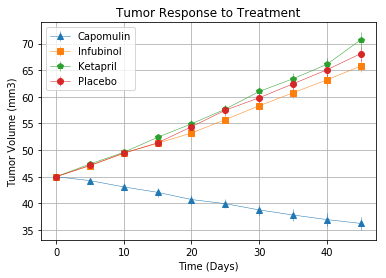

In [73]:
# Generate the Plot (with Error Bars)
#select and plot subsets "Capomulin","Infubinol","Ketapril","Placebo"
fig, ax = plt.subplots()
ax.errorbar(tumor_response_pivot_mean.index,tumor_response_pivot_mean.Capomulin, yerr = tumor_response_pivot_sem.Capomulin,linestyle = "-",linewidth = .5, fmt = "^")
ax.errorbar(tumor_response_pivot_mean.index,tumor_response_pivot_mean.Infubinol, yerr = tumor_response_pivot_sem.Infubinol,linestyle = "-",linewidth = .5, fmt = "s")
ax.errorbar(tumor_response_pivot_mean.index,tumor_response_pivot_mean.Ketapril, yerr = tumor_response_pivot_sem.Ketapril,linestyle = "-",linewidth = .5, fmt = "p")
ax.errorbar(tumor_response_pivot_mean.index,tumor_response_pivot_mean.Placebo, yerr = tumor_response_pivot_sem.Placebo,linestyle = "-",linewidth =.5, fmt = "o")            

#Set up the plot
plt.title("Tumor Response to Treatment")
plt.legend(loc = "best")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

# Save the Figure
plt.savefig('tumor_response.png')

<Figure size 432x288 with 0 Axes>

<ErrorbarContainer object of 3 artists>

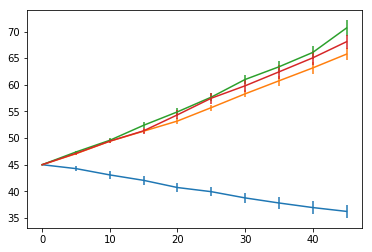

In [ ]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()